In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from flask import Flask, jsonify

In [4]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

last_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= last_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prec_df = pd.DataFrame(precipitation_scores, columns=['Date','Precipitation'])

prec_df.set_index('Date', inplace=True)

# Sort the dataframe by date

prec_df=prec_df.sort_values("Date")



In [14]:
prec_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


Text(0, 0.5, 'Inches')

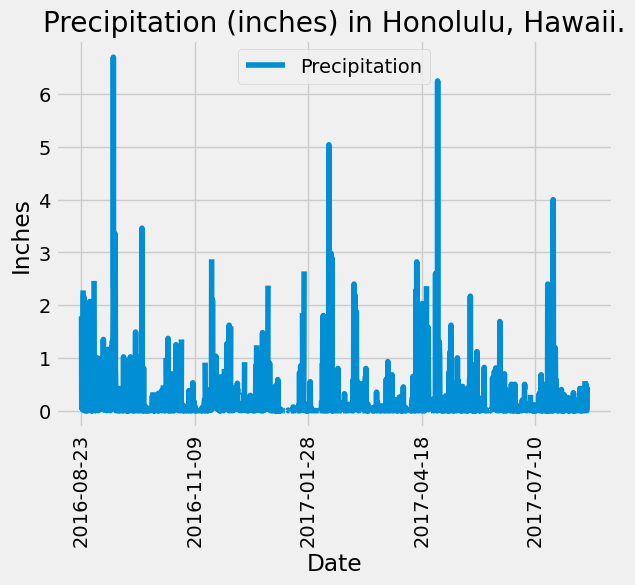

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
y_axis = np.arange(0,max(prec_df["Precipitation"]))
y_tick_location = [value for value in y_axis]

ax1=prec_df.plot()

# ax1.set_ylabel("Precipitation (In)")

plt.yticks(y_tick_location)
plt.xticks(rotation = 90)
plt.title(f"Precipitation (inches) in Honolulu, Hawaii.")
plt.ylabel("Inches")

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
session.query(func.distinct(Measurement.station)).count()

9

In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(func.count(Measurement.station),Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
calculations = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").all()

for calc in calculations:
    print(F"Lowest: {calc[0]}, Highest: {calc[1]}, Average: {calc[2]}")

Lowest: 54.0, Highest: 85.0, Average: 71.66378066378067


In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
latest_date_query = session.query(Measurement.date).\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date.desc()).first()

year_ago = dt.date(2017,8,18) - dt.timedelta(days=365)

last_twelve_months = session.query(Measurement.tobs).\
    filter(Measurement.station == "USC00519281").\
    filter(Measurement.date >= year_ago).all()
    
station_df = pd.DataFrame(last_twelve_months, columns=['tobs'])

In [22]:
station_df.head()

,tobs
0,80.0
1,79.0
2,81.0
3,79.0
4,78.0


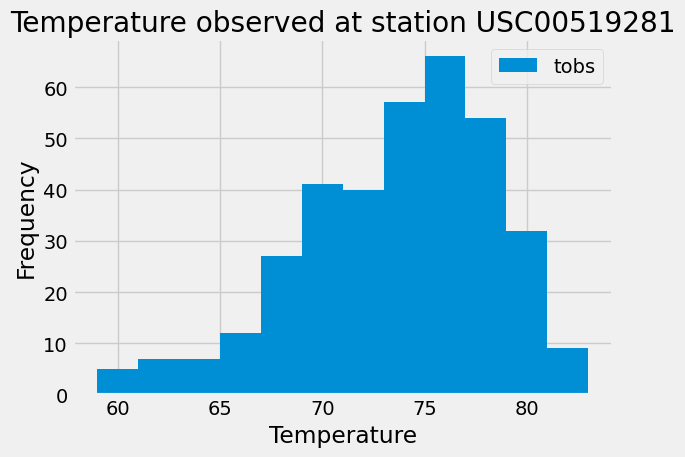

In [23]:
# plot the results as a histogram - check how to get rid of tobs
ax = station_df.plot.hist(bins=12)
ax.set_xlabel("Temperature")
plt.title('Temperature observed at station USC00519281')
plt.tight_layout()

# Close session

In [24]:
# Close Session
session.close()